In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
df = pd.read_csv('Students Performance.csv')

print("Dataset shape:", df.shape)

Dataset shape: (1000, 8)


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writin

In [ ]:
print("Basic Statistics of Scores:")
print(df[['math score', 'reading score', 'writing score']].describe())

1. Basic Statistics of Scores:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


Categorical Variables Distribution:


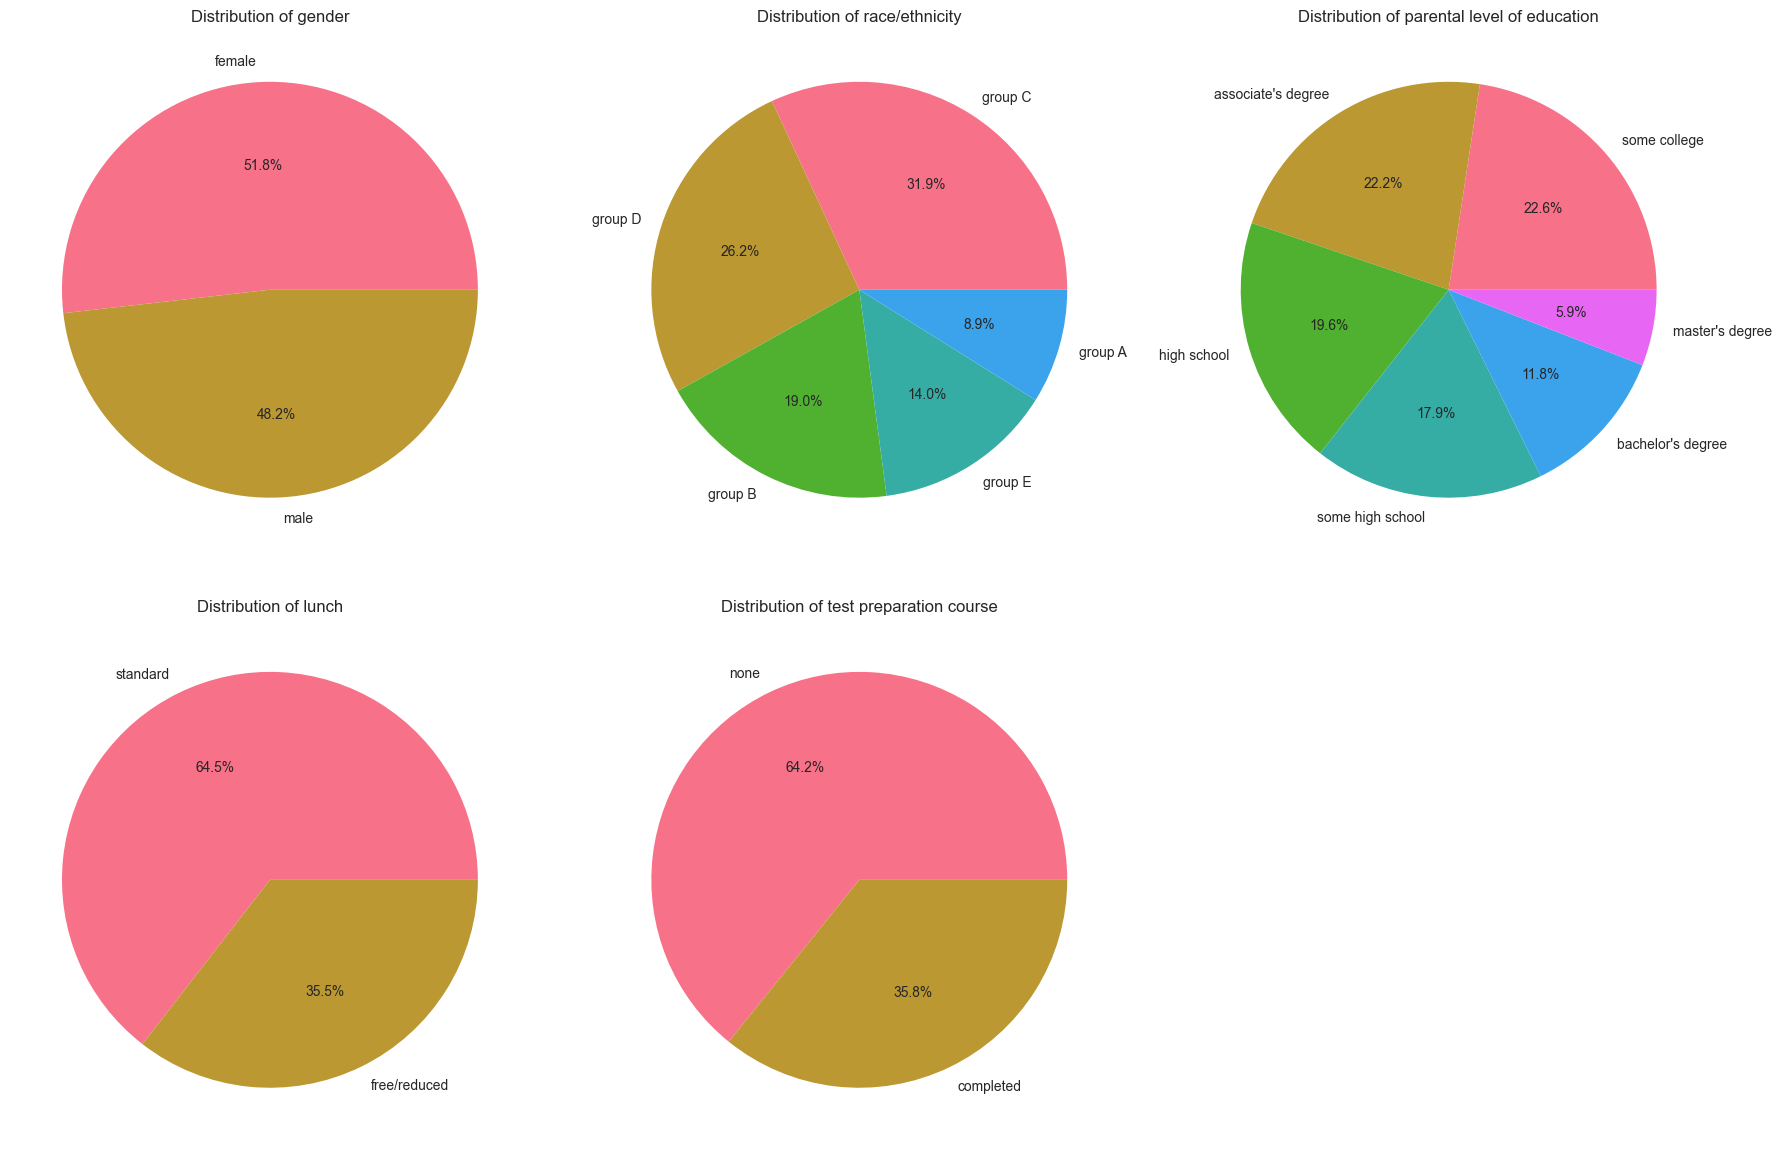

In [18]:
print("Categorical Variables Distribution:")
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'Distribution of {col}')

axes[5].axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Print value counts
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


gender:
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


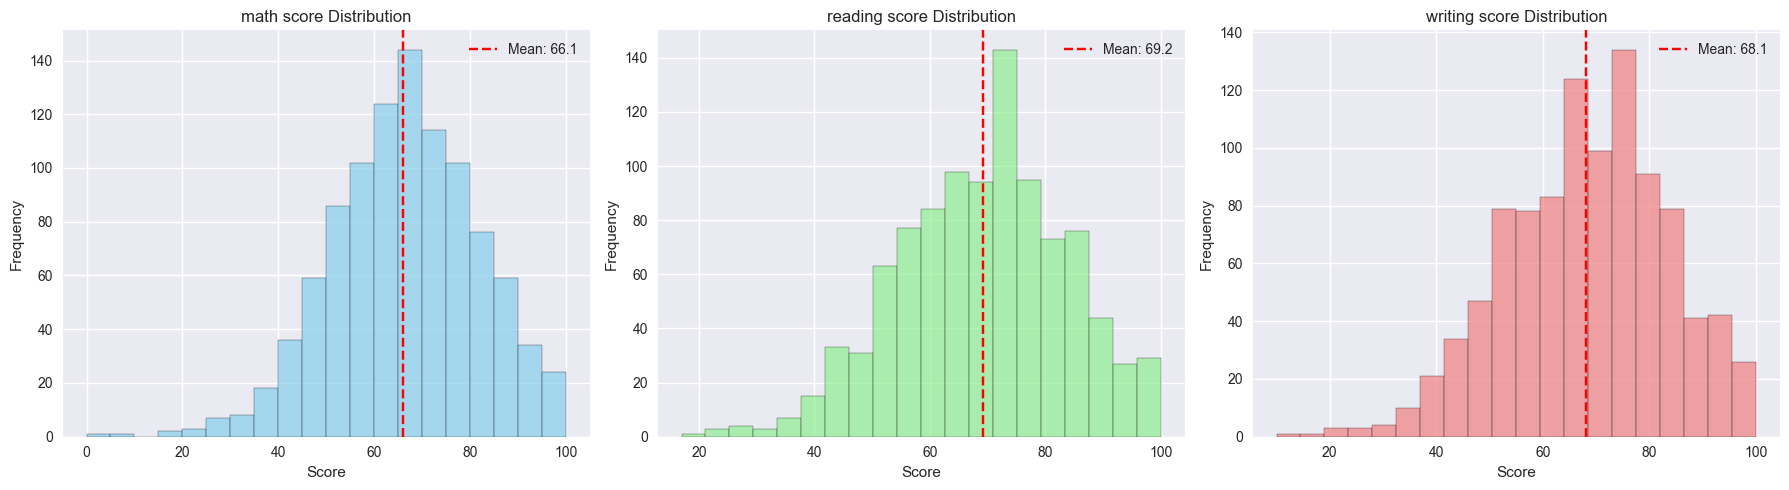

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

score_cols = ['math score', 'reading score', 'writing score']
colors = ['skyblue', 'lightgreen', 'lightcoral']

for i, (col, color) in enumerate(zip(score_cols, colors)):
    axes[i].hist(df[col], bins=20, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

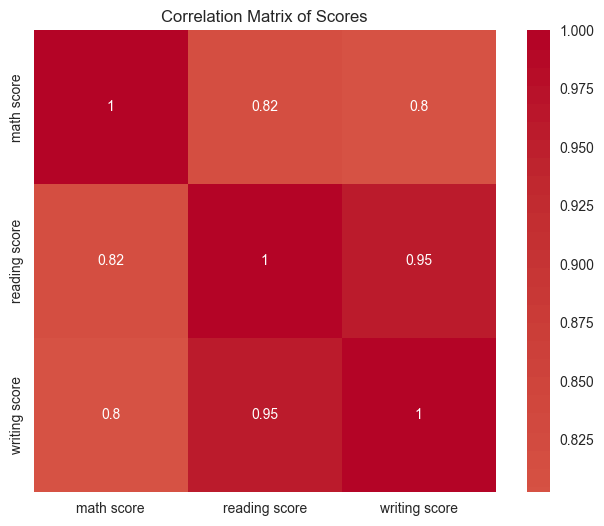

In [10]:
correlation_matrix = df[score_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Scores')
plt.show()

In [20]:
print("Gender Impact on Scores:")
gender_impact = df.groupby('gender')[score_cols].mean()
print(gender_impact)

Gender Impact on Scores:
        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


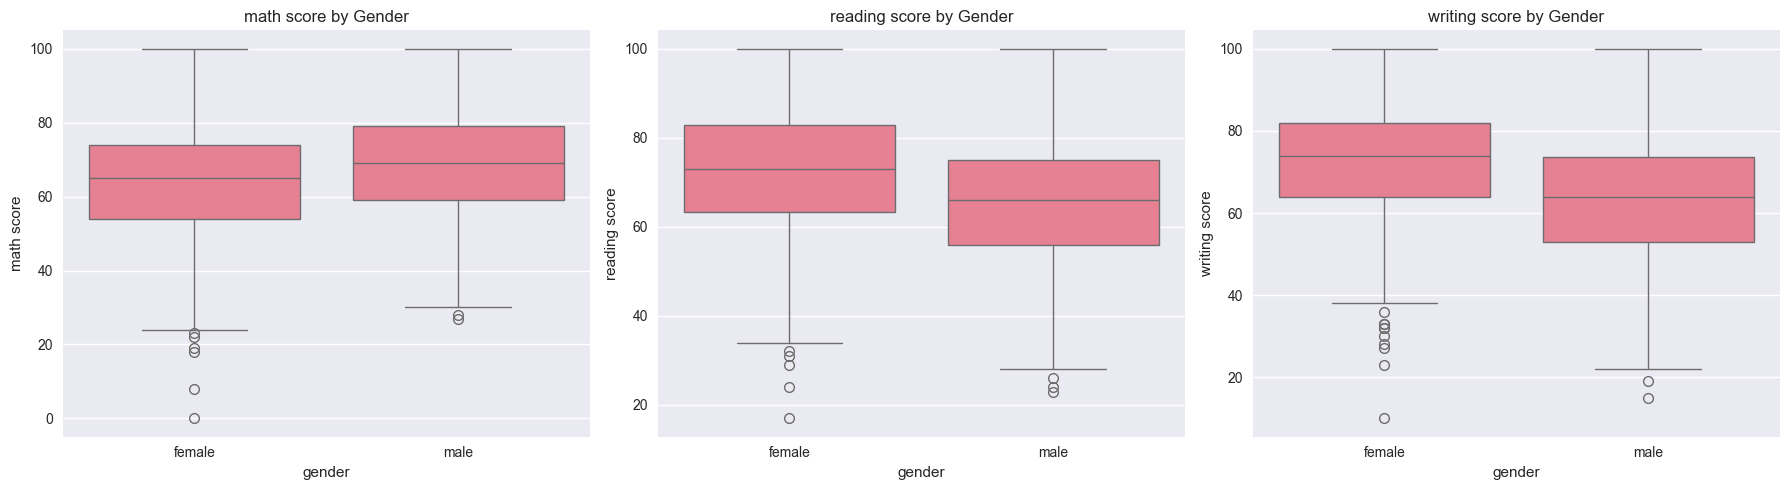

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(score_cols):
    sns.boxplot(data=df, x='gender', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Gender')
plt.tight_layout()
plt.show()

In [22]:
print("Parental Education Impact on Scores:")
education_impact = df.groupby('parental level of education')[score_cols].mean().round(2)
print(education_impact)

Parental Education Impact on Scores:
                             math score  reading score  writing score
parental level of education                                          
associate's degree                67.88          70.93          69.90
bachelor's degree                 69.39          73.00          73.38
high school                       62.14          64.70          62.45
master's degree                   69.75          75.37          75.68
some college                      67.13          69.46          68.84
some high school                  63.50          66.94          64.89


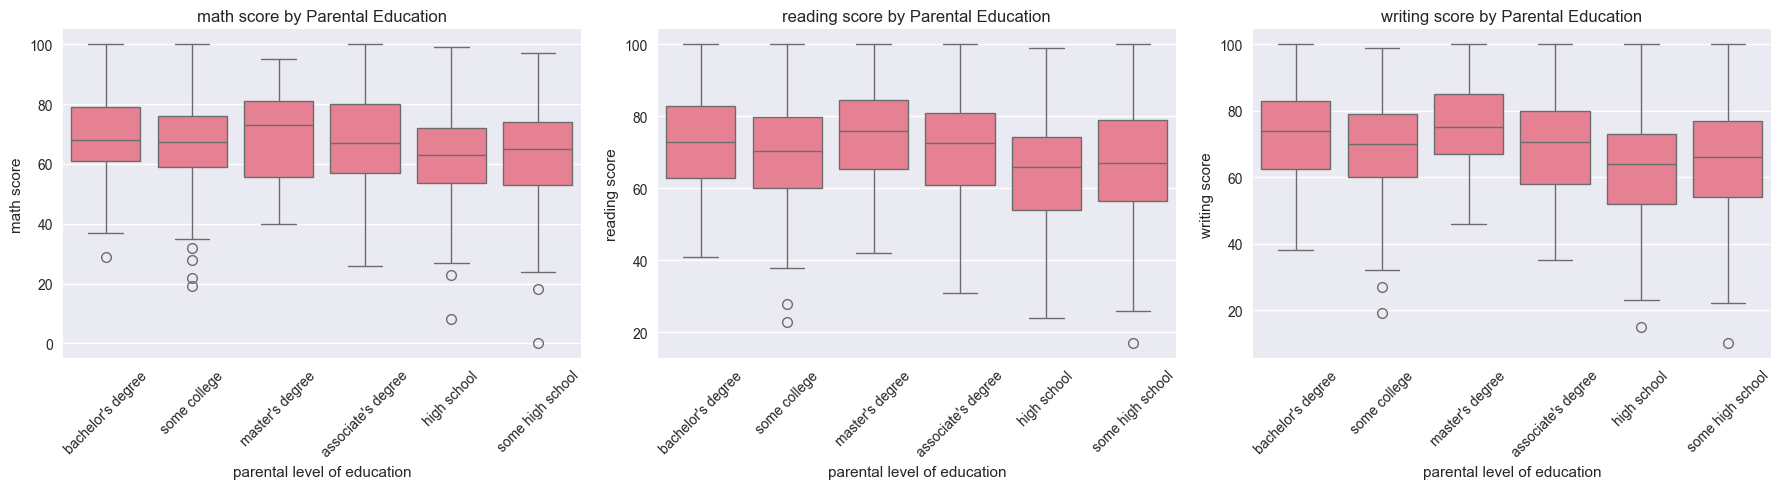

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(score_cols):
    sns.boxplot(data=df, x='parental level of education', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Parental Education')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [24]:
print("Test Preparation Impact on Scores:")
prep_impact = df.groupby('test preparation course')[score_cols].mean().round(2)
print(prep_impact)

Test Preparation Impact on Scores:
                         math score  reading score  writing score
test preparation course                                          
completed                     69.70          73.89          74.42
none                          64.08          66.53          64.50


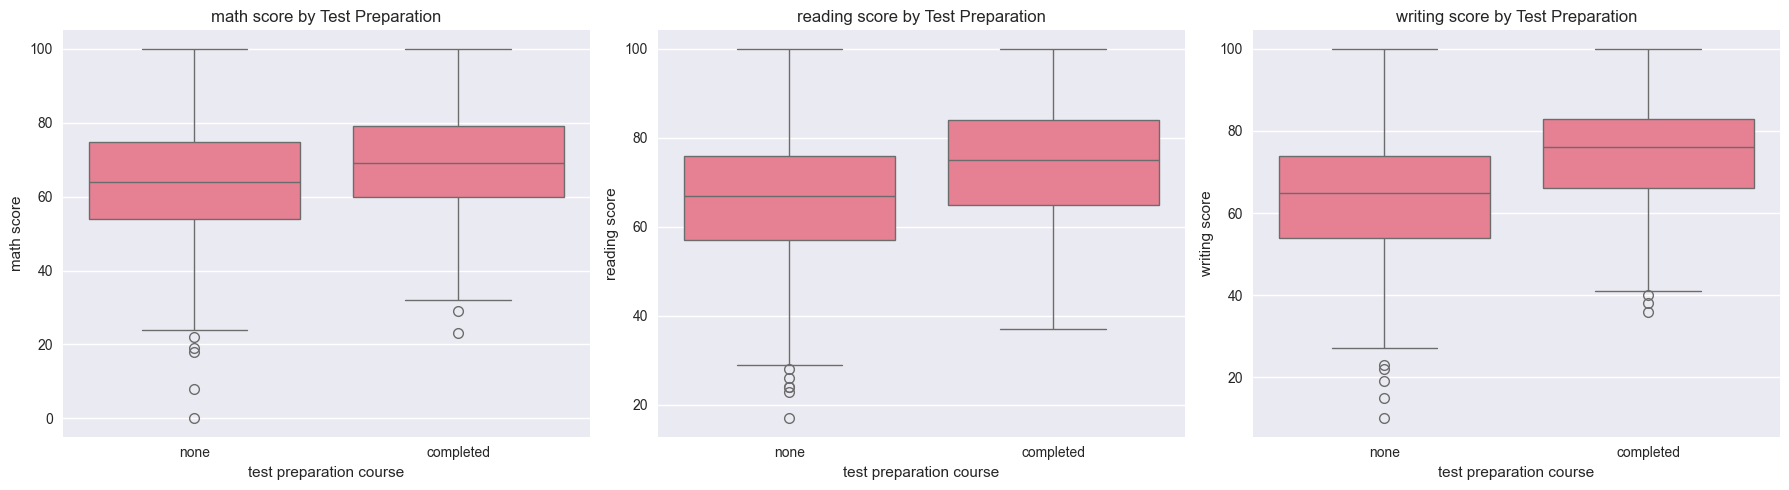

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(score_cols):
    sns.boxplot(data=df, x='test preparation course', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Test Preparation')
plt.tight_layout()
plt.show()

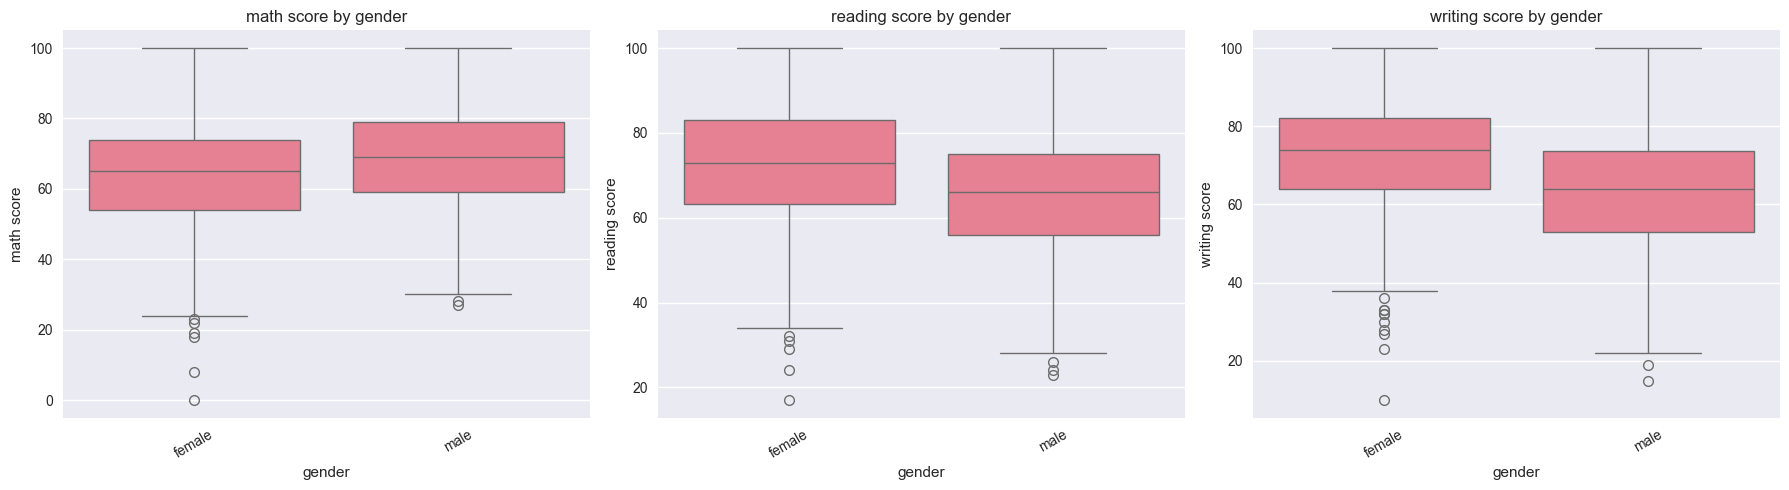

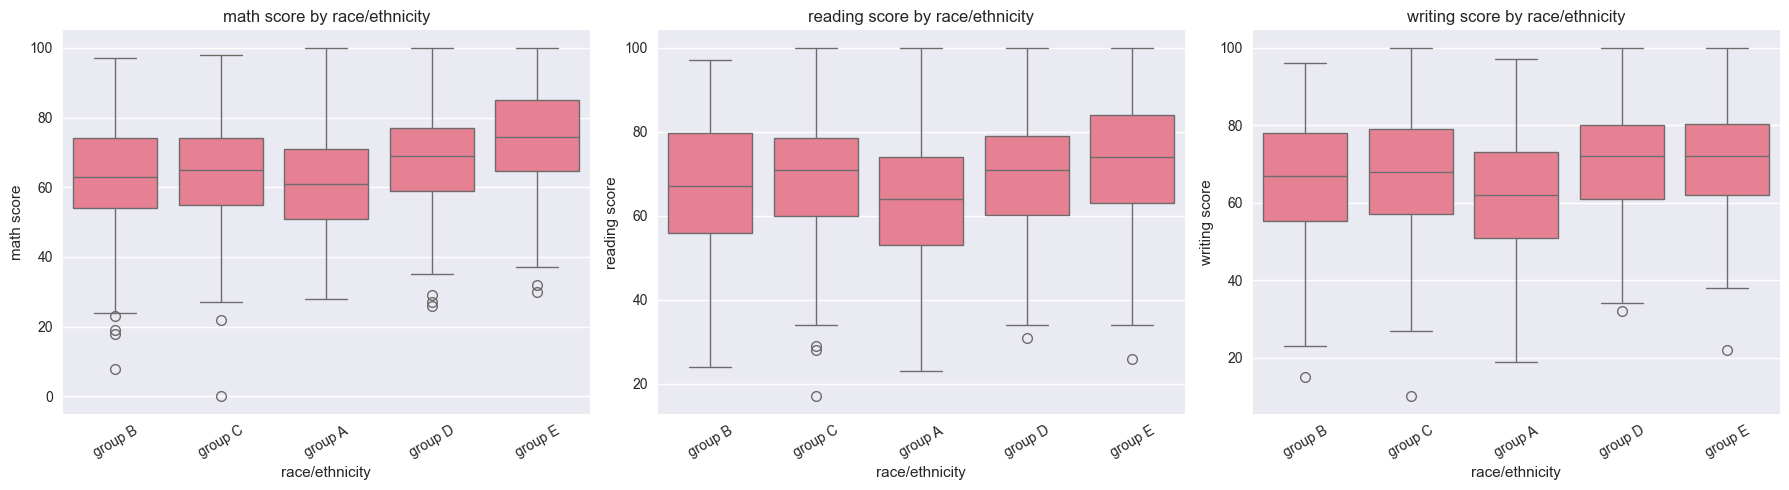

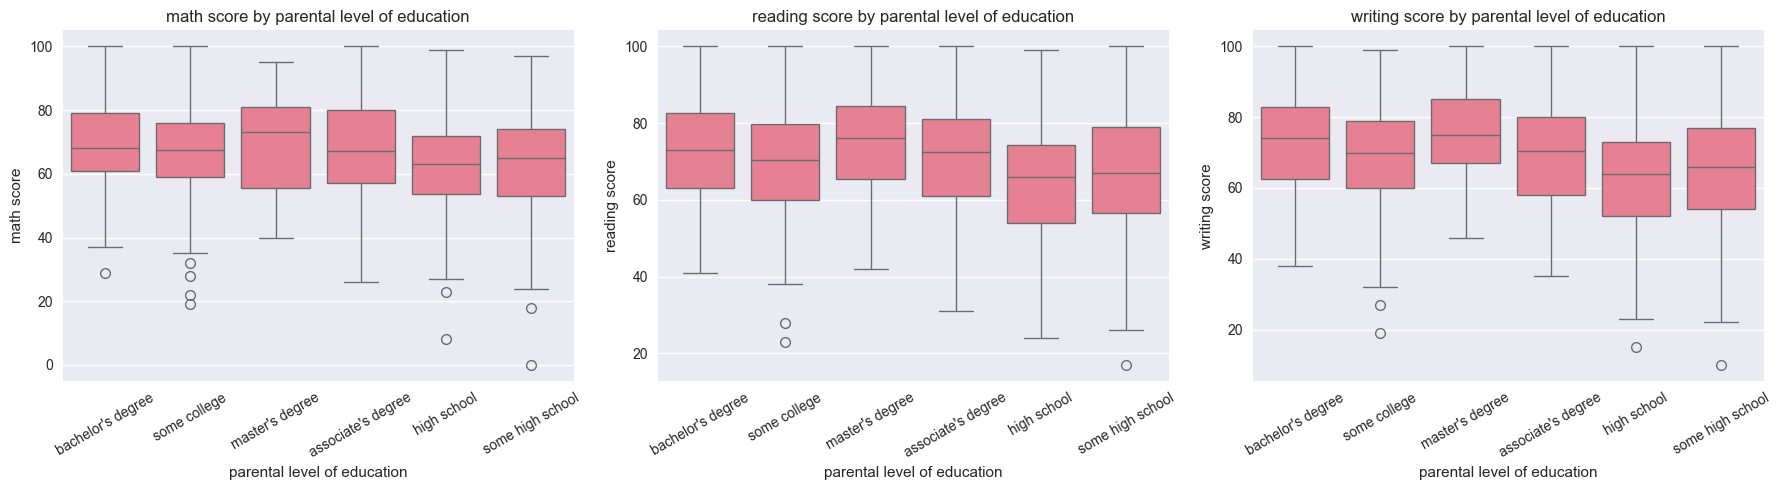

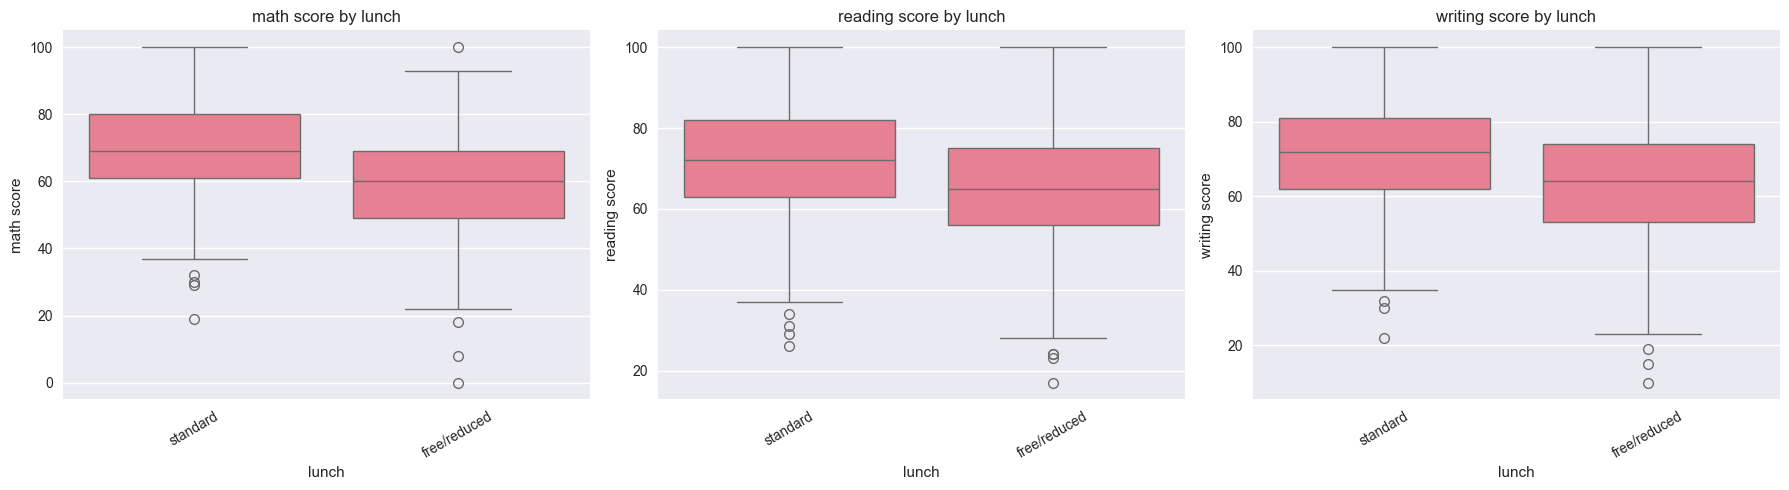

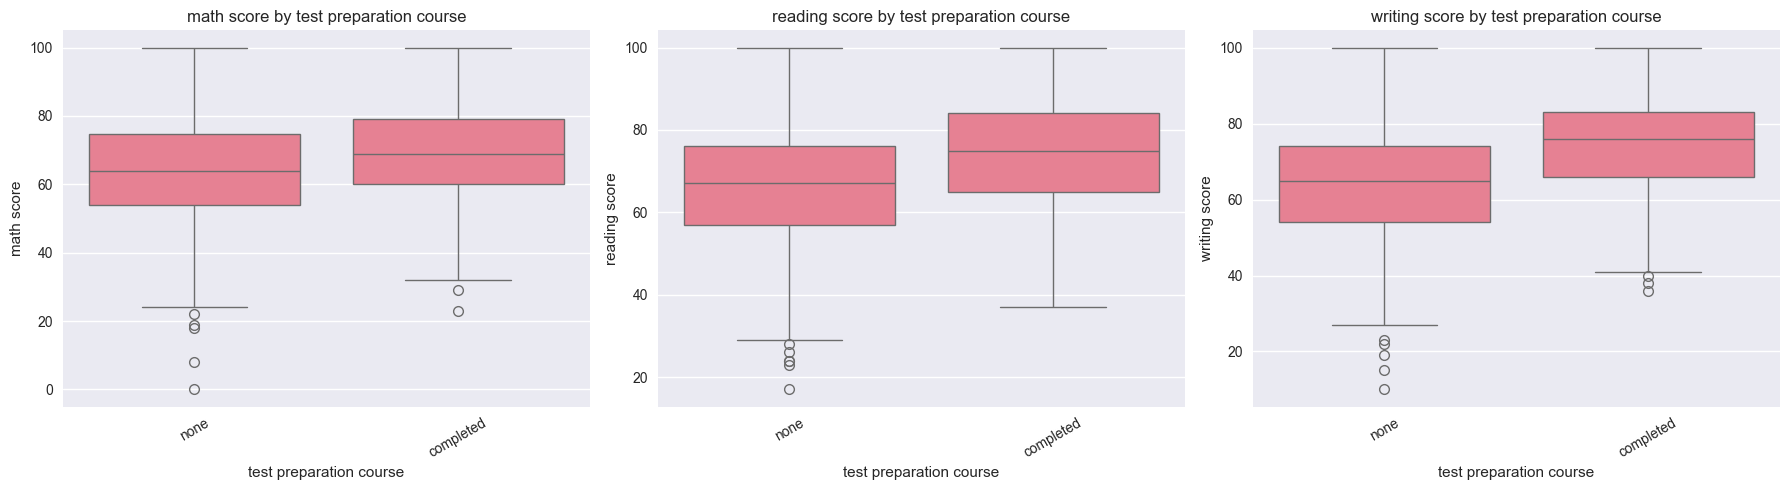

In [26]:
for factor in categorical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, score in enumerate(score_cols):
        sns.boxplot(x=factor, y=score, data=df, ax=axes[i])
        axes[i].set_title(f"{score} by {factor}")
        axes[i].tick_params(axis="x", rotation=30)
    plt.tight_layout()
    plt.show()

In [27]:
categorical_cols = [
    "gender", "race/ethnicity", "parental level of education",
    "lunch", "test preparation course"
]
score_cols = ["math score", "reading score", "writing score"]

def train_and_evaluate(target, extra_features):

    print(f"\nPredicting {target.upper()}")
    
    X = df[categorical_cols + extra_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols),
            ("num", StandardScaler(), extra_features)
        ]
    )

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", GradientBoostingRegressor(
            n_estimators=300, learning_rate=0.1, max_depth=4, random_state=42))
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.2f}")
    
    return pipe


math_model = train_and_evaluate("math score", ["reading score", "writing score"])
reading_model = train_and_evaluate("reading score", ["math score", "writing score"])
writing_model = train_and_evaluate("writing score", ["math score", "reading score"])


Predicting MATH SCORE
MAE : 4.51
RMSE: 5.94
R²  : 0.86

Predicting READING SCORE
MAE : 3.62
RMSE: 4.50
R²  : 0.91

Predicting WRITING SCORE
MAE : 3.32
RMSE: 4.17
R²  : 0.93
